In [1]:
import sys
sys.path.insert(0, "/Users/rstiskalek/Projects/candel")

from os.path import join, basename

import numpy as np
import matplotlib.pyplot as plt
from h5py import File
import scienceplots

import candel
from candel import plot_corner_from_hdf5, read_samples
from utils import * 


%matplotlib inline
%load_ext autoreload
%autoreload 2


COLS = ["#87193d", "#1e42b9", "#d42a29", "#05dd6b", "#ee35d5"]

config_path = "/Users/rstiskalek/Projects/CANDEL/scripts/runs/config.toml"
config = candel.load_config(config_path, )
root = join("/Users/rstiskalek/Projects/CANDEL/", "results", "dH0")

In [3]:
!ls /Users/rstiskalek/Projects/CANDEL/results/dH0/*CF4_W1*.hdf5

/Users/rstiskalek/Projects/CANDEL/results/dH0/Vext_CF4_W1_MNR.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/Vext_CF4_W1_MNR_zeropoint_dipole.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_bad_photo_too.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_dust-CSFD.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_dust-Planck2016.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_dust-SFD.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_dust-default.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_exclude_lowz.hdf5
/Users/rstiskalek/Projects/CANDE

## Posterior summary

In [8]:
fname = join(root, "precomputed_los_precomputed_los_Carrick2015_PantheonPlusLane_MNR.hdf5")
# fname = join(root, "precomputed_los_precomputed_los_Carrick2015_2MTF_MNR_zeropoint_dipole.hdf5")
# fname = "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_UnifComponents.hdf5"
# fname = "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_bad_photo_too.hdf5"

with File(fname, "r") as f:
    grp = f["samples"]
    # print(f"keys: {list(grp.keys())}")

    samples = {key: grp[key][...] for key in grp.keys()}


# keys_read = ["zeropoint_dipole_mag", "zeropoint_dipole_ell", "zeropoint_dipole_b", "dH0"]
keys_read = ["sigma_int"]
# keys_read = ["zeropoint_dipole_mag", "dH0"]
# keys_read = ['M_dipole_b', 'M_dipole_ell', 'M_dipole_mag']
# keys_read = ['Vext_b', 'Vext_ell', 'Vext_mag']

# samples["dH0"] = 10**(samples["M_dipole_mag"] / 5) - 1

for key in keys_read:
    if key == "dH0":
        x = 10**(samples["zeropoint_dipole_mag"] / 5) - 1
    else:
        x = samples[key]

    low, med, high = np.percentile(x, [16, 50, 84])
    low = med - low
    high = high - med
    print(f"{key}: {med:.3f} +{high:.3f} -{low:.3f}")


# logZ = compare_zeropoint_dipole_gof(fname, "logZ_harmonic")
# print(f"logZ_harmonic: {logZ:.3f}")

sigma_int: 0.138 +0.008 -0.007


### Carrick+2015 MNR posterior with a dipole

precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v
Removed no burn in
Removed no burn in
2025-08-29 11:59:49 [INFO] Saving GetDist triangle plot to: /Users/rstiskalek/Downloads/C15_full_posterior.pdf


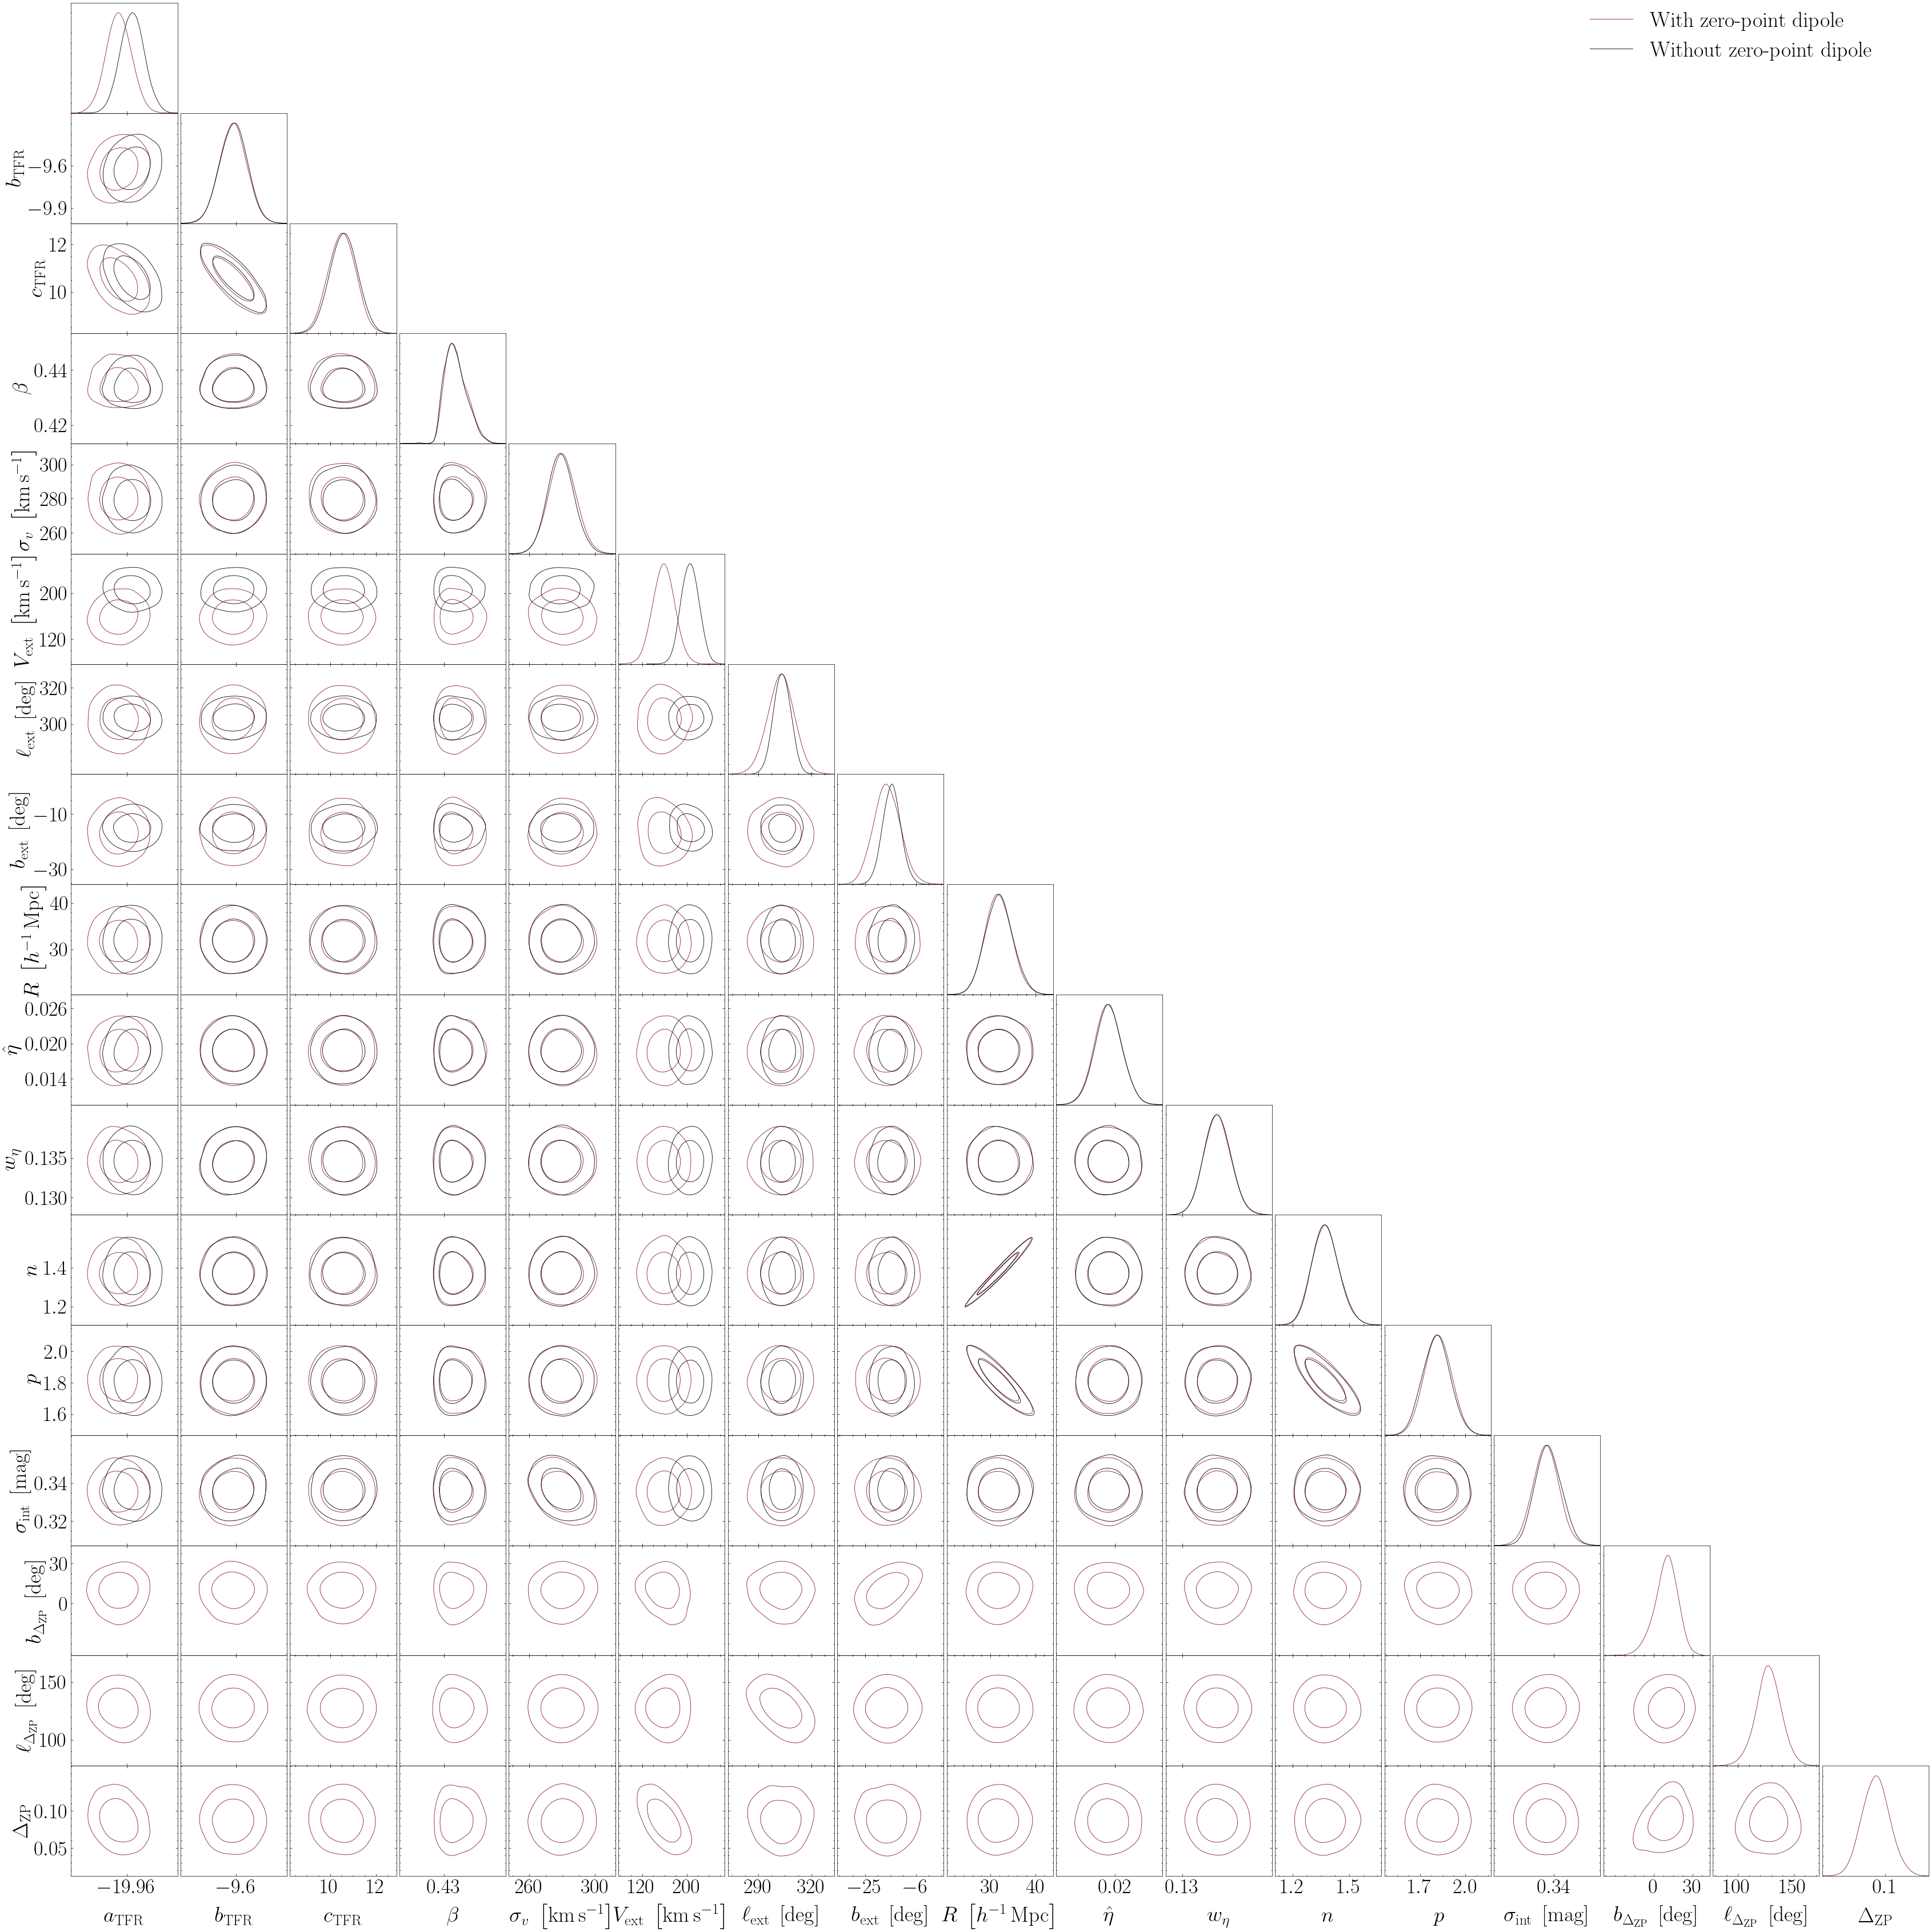

In [11]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR.hdf5",
    ]

cols = [
    COLS[0],
    "k",
    ]

labels = [
    "With zero-point dipole",
    "Without zero-point dipole",
    ]

fnames = [join(root, "precomputed_los_" + f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    labels=labels,
    cols=cols,
    fontsize=30,
    filled=False,
    keys=None,
    filename="/Users/rstiskalek/Downloads/C15_full_posterior.pdf",
    )

### Zoom-in on the magnitude dipole

precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v
precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_dust-SFD.hdf5: R_dist_emp, R_dust, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_dust-CSFD.hdf5: R_dist_emp, R_dust, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_st

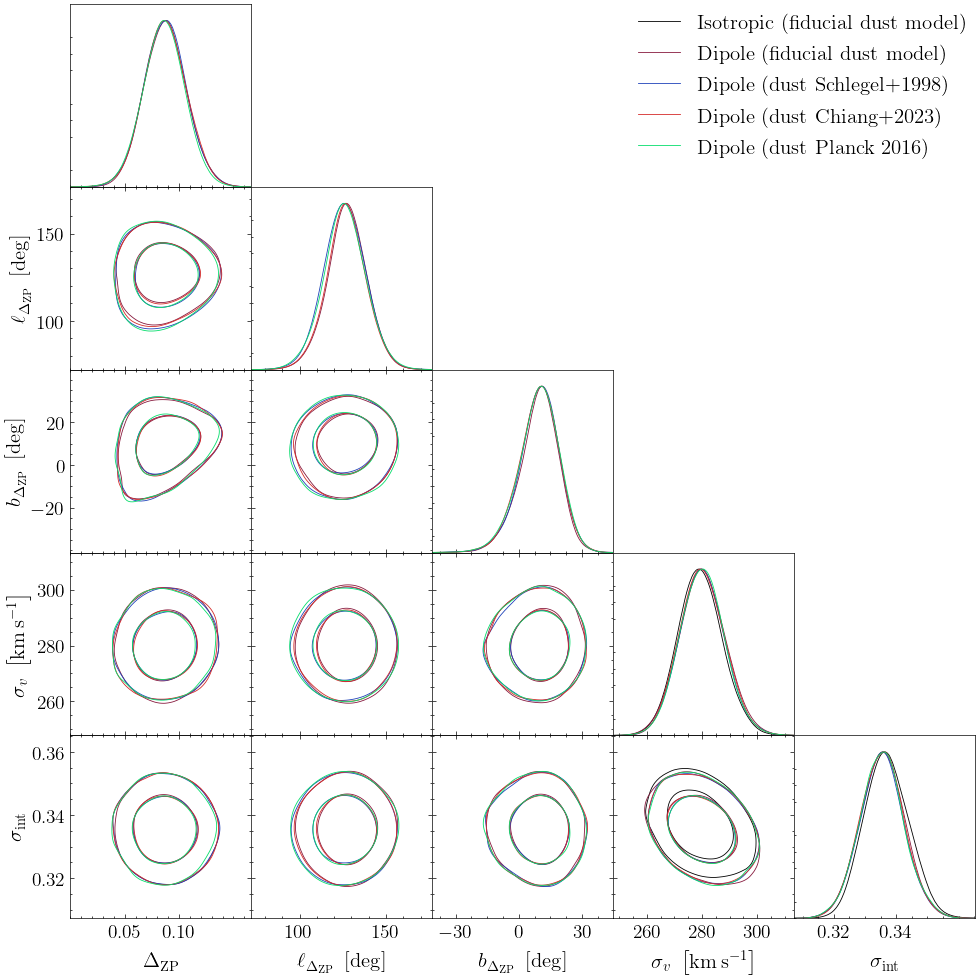

In [14]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_dust-SFD.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_dust-CSFD.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_dust-Planck2016.hdf5",
    ]

labels = [
    "Isotropic (fiducial dust model)",
    "Dipole (fiducial dust model)",
    "Dipole (dust Schlegel+1998)",
    "Dipole (dust Chiang+2023)",
    "Dipole (dust Planck 2016)",
    ]

cols = [
    "k",
    COLS[0],
    COLS[1],
    COLS[2],
    COLS[3],
]

fnames = [join(root, "precomputed_los_" + f) for f in fnames]

points = {("zeropoint_dipole_ell", "zeropoint_dipole_b"): (272 - 180, -28)}

plot_corner_from_hdf5(
    fnames,
    fontsize=18,
    filled=False,
    labels=labels,
    cols=cols,
    keys=["zeropoint_dipole_mag", "zeropoint_dipole_ell", "zeropoint_dipole_b", "sigma_v", "sigma_int",],
    filename="/Users/rstiskalek/Downloads/C15_mag_dipole.pdf",
    # points=points,
    )

### Dipole prior dependence

precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_UnifComponents.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
Removed no burn in
Removed no burn in
2025-08-27 13:03:31 [INFO] Saving GetDist triangle plot to: /Users/rstiskalek/Downloads/dipole_prior_dependence.pdf


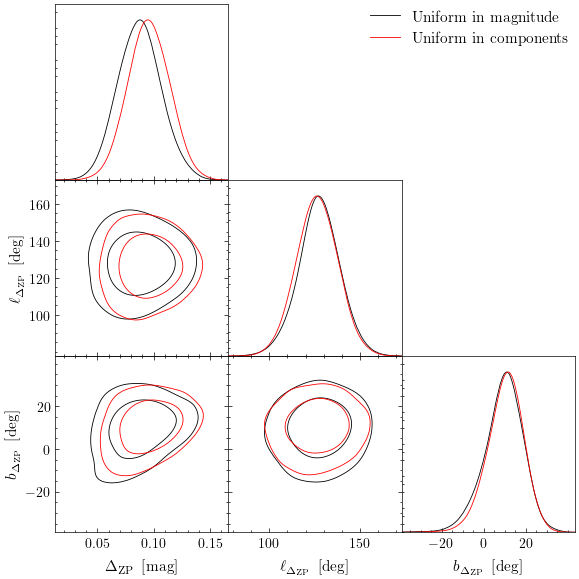

In [20]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_UnifComponents.hdf5",
    ]

labels = [
    "Uniform in magnitude",
    "Uniform in components",
    # "Dipole",
    # "Dipole + dust (Schlegel+1998)",
    # "Dipole + dust (Schlafly \& Finkbeiner 2011)",
    # "Dipole + dust (Planck)",
    ]

fnames = [join(root, "precomputed_los_" + f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    fontsize=14,
    filled=False,
    labels=labels,
    keys=["zeropoint_dipole_mag", "zeropoint_dipole_ell", "zeropoint_dipole_b",],
    filename="/Users/rstiskalek/Downloads/dipole_prior_dependence.pdf",
    )

### Dipoles in CF4, 2MTF, SFI++, Pantheon+

precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
precomputed_los_precomputed_los_Carrick2015_SFI_MNR_zeropoint_dipole.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
precomputed_los_precomputed_los_Carrick2015_2MTF_MNR_zeropoint_dipole.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
precomputed_los_precomputed_los_Carrick2015_PantheonPlus_MNR_zeropoint_dipole.hdf5: M, R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, beta,

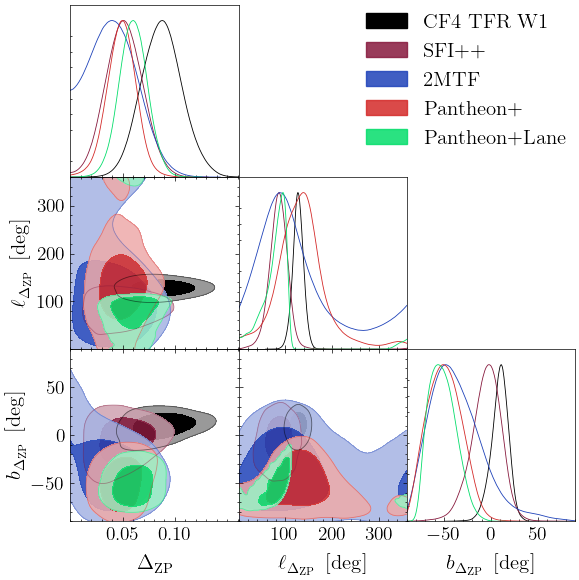

In [16]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_SFI_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_2MTF_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_PantheonPlus_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_PantheonPlusLane_MNR_zeropoint_dipole.hdf5",
    ]

labels = [
    "CF4 TFR W1",
    "SFI++",
    "2MTF",
    "Pantheon+",
    "Pantheon+Lane",
]

cols = ["k",
        COLS[0],
        COLS[1],
        COLS[2],
        COLS[3],
        ]

fnames = [join(root, "precomputed_los_" + f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    labels=labels,
    cols=cols,
    fontsize=18,
    keys=["zeropoint_dipole_mag", "zeropoint_dipole_ell", "zeropoint_dipole_b",],
    filled=True,
    filename="/Users/rstiskalek/Downloads/C15_all_TFR.pdf",
    )

### Literature direction comparison

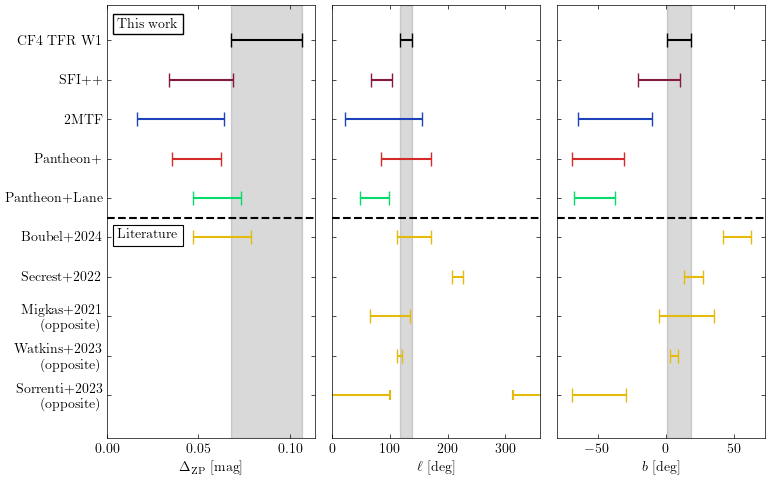

In [ ]:

def circ_percentiles_deg(a, qs=(16, 50, 84)):
    """Circular percentiles on [0, 360) with NaN robustness."""
    a = np.asarray(a).ravel() % 360.0
    a = a[~np.isnan(a)]
    if a.size == 0:
        return np.array([np.nan, np.nan, np.nan])

    ang = np.deg2rad(a)
    c = np.nanmean(np.cos(ang))
    s = np.nanmean(np.sin(ang))
    mu = (np.rad2deg(np.arctan2(s, c)) + 360.0) % 360.0

    # unwrap around mean direction to [-180, 180)
    x = ((a - mu + 180.0) % 360.0) - 180.0
    p = np.nanpercentile(x, qs)
    return (mu + p) % 360.0


def _plot_linear_whisker(ax, med, lo, hi, y, color, lw):
    if np.isnan(med) or np.isnan(lo) or np.isnan(hi):
        return
    ax.errorbar(
        med, y,
        xerr=[[med - lo], [hi - med]],
        fmt="none",
        ecolor=color,
        elinewidth=1.5 * lw,
        capsize=5,
        zorder=2,
    )


def _plot_circ_whisker(ax, med, lo, hi, y, color, lw, cap_frac=0.12):
    """Whisker on [0,360): draws proper caps when interval wraps."""
    if np.isnan(med) or np.isnan(lo) or np.isnan(hi):
        return

    med = float(med % 360.0)
    lo = float(lo % 360.0)
    hi = float(hi % 360.0)

    # unwrap ends around median (shortest arc)
    lo_u = ((lo - med + 180.0) % 360.0) - 180.0
    hi_u = ((hi - med + 180.0) % 360.0) - 180.0
    if lo_u > hi_u:
        lo_u, hi_u = hi_u, lo_u
    lo_abs = (med + lo_u) % 360.0
    hi_abs = (med + hi_u) % 360.0

    lw_err = 1.5 * lw
    cap_h  = cap_frac  # vertical half-height of end-caps in y-data units

    if lo_abs <= hi_abs:
        # simple case: no wrap -> use errorbar (gets caps automatically)
        ax.errorbar(
            med, y,
            xerr=[[med - lo_abs], [hi_abs - med]],
            fmt="none",
            ecolor=color,
            elinewidth=lw_err,
            capsize=5,
            zorder=2,
        )
    else:
        # wrap case: draw two segments + explicit end-caps
        ax.hlines(y, 0.0,   hi_abs,  colors=color, linewidth=lw_err, zorder=2)
        ax.hlines(y, lo_abs, 360.0,  colors=color, linewidth=lw_err, zorder=2)

        # end-caps as short vertical ticks at the two ends
        ax.vlines(hi_abs, y - cap_h, y + cap_h, colors=color, linewidth=lw_err, zorder=3)
        ax.vlines(lo_abs, y - cap_h, y + cap_h, colors=color, linewidth=lw_err, zorder=3)


def _fill_circ_band(ax, med, lo, hi, color, alpha=0.15, zorder=-3):
    if np.isnan(med) or np.isnan(lo) or np.isnan(hi):
        return

    med = float(med % 360.0)
    lo = float(lo % 360.0)
    hi = float(hi % 360.0)

    lo_u = ((lo - med + 180.0) % 360.0) - 180.0
    hi_u = ((hi - med + 180.0) % 360.0) - 180.0
    if lo_u > hi_u:
        lo_u, hi_u = hi_u, lo_u
    lo_abs = (med + lo_u) % 360.0
    hi_abs = (med + hi_u) % 360.0

    if lo_abs <= hi_abs:
        ax.axvspan(lo_abs, hi_abs, color=color, alpha=alpha, zorder=zorder)
    else:
        ax.axvspan(0.0, hi_abs, color=color, alpha=alpha, zorder=zorder)
        ax.axvspan(lo_abs, 360.0, color=color, alpha=alpha, zorder=zorder)


def _pad(xlo, xhi, frac=0.08):
    d = xhi - xlo
    d = d if np.isfinite(d) and d > 0 else 1.0
    return xlo - frac * d, xhi + frac * d


# ===================== load samples =====================

keys = ["zeropoint_dipole_mag", "zeropoint_dipole_ell", "zeropoint_dipole_b"]
S = [read_samples(root, f, keys=keys) for f in fnames]

mag_samps = [np.asarray(s["zeropoint_dipole_mag"]).ravel() for s in S]
ell_samps = [np.asarray(s["zeropoint_dipole_ell"]).ravel() % 360.0 for s in S]
b_samps   = [np.asarray(s["zeropoint_dipole_b"]).ravel() for s in S]

# ===================== summarise =====================

mag_q = np.array([np.nanpercentile(s, [16, 50, 84]) for s in mag_samps])
b_q   = np.array([np.nanpercentile(s, [16, 50, 84]) for s in b_samps])
ell_q = np.array([circ_percentiles_deg(s) for s in ell_samps])

mag_med, mag_lo, mag_hi = mag_q[:, 1], mag_q[:, 0], mag_q[:, 2]
b_med,   b_lo,   b_hi   = b_q[:, 1],   b_q[:, 0],   b_q[:, 2]
ell_med, ell_lo, ell_hi = ell_q[:, 1], ell_q[:, 0], ell_q[:, 2]

# ===================== y positions =====================

n = len(labels)
y = np.arange(n - 1, -1, -1)  # top -> bottom

# ===================== literature (placeholders) =====================

# Each item: (label, mag_mu, mag_sigma, ell_mu_deg, ell_sigma_deg, b_mu_deg, b_sigma_deg)
lit_col = "#e4ba0c"
literature = [
    ("Boubel+2024", 0.063, 0.016, 142.0, 30,  52,  10),
    ("Secrest+2022", None, None, 217, 10.0,  20, 7),
    ("Migkas+2021\n(opposite)", None, None, 280 - 180, 35,  (-1) * -15, 20),
    ("Watkins+2023\n(opposite)", None, None, 297 - 180, 4,  (-1) * -6, 3),
    ("Sorrenti+2023\n(opposite)", None, None, 207 - 180, 73, (-1) * 49, 20)
]

# precompute where the literature rows will sit
lit_base = -1  # start just below 0
lit_positions = [(lit_base - j, lab) for j, (lab, *_vals) in enumerate(literature)]

# ===================== figure =====================

fig_w, fig_h = 7.9, 3.0 + 0.2 * (n + len(literature))
with plt.style.context("science"):
    fig, (ax_mag, ax_ell, ax_b) = plt.subplots(
        1, 3, figsize=(fig_w, fig_h), sharey=True
    )
    lw = plt.rcParams["lines.linewidth"]

    # Force yticks/labels on the left (sharey=True suppresses them otherwise)
    ax_mag.tick_params(which="both", left=True, labelleft=True)
    ax_ell.tick_params(labelleft=False)
    ax_b.tick_params(labelleft=False)

    # ===== shaded bands for fiducial (CF4 W1) =====
    fid_idx = [i for i, lab in enumerate(labels) if ("CF4" in lab and "W1" in lab)]
    if not fid_idx:
        raise ValueError("Could not find fiducial 'CF4'+'W1' in labels.")
    fid_idx = fid_idx[0]
    fid_col = cols[fid_idx]

    ax_mag.axvspan(mag_lo[fid_idx], mag_hi[fid_idx],
                   color=fid_col, alpha=0.15, zorder=-3)
    _fill_circ_band(ax_ell, ell_med[fid_idx], ell_lo[fid_idx], ell_hi[fid_idx],
                    color=fid_col, alpha=0.15, zorder=-3)
    ax_b.axvspan(b_lo[fid_idx], b_hi[fid_idx],
                 color=fid_col, alpha=0.15, zorder=-3)

    # ===== whiskers: datasets =====
    for i in range(n):
        _plot_linear_whisker(ax_mag, mag_med[i], mag_lo[i], mag_hi[i],
                             y[i], cols[i], lw)
        _plot_circ_whisker(ax_ell, ell_med[i], ell_lo[i], ell_hi[i],
                           y[i], cols[i], lw)
        _plot_linear_whisker(ax_b, b_med[i], b_lo[i], b_hi[i],
                             y[i], cols[i], lw)

    # ===== literature block (below) =====
    for (ypos, lab), (_lab, m_mu, m_sig, l_mu, l_sig, bb_mu, bb_sig) in zip(
        lit_positions, literature
    ):
        if m_mu is not None:
            _plot_linear_whisker(ax_mag, m_mu, m_mu - m_sig, m_mu + m_sig,
                                 ypos, lit_col, lw)
        _plot_circ_whisker(ax_ell, l_mu, l_mu - l_sig, l_mu + l_sig,
                           ypos, lit_col, lw)
        _plot_linear_whisker(ax_b, bb_mu, bb_mu - bb_sig, bb_mu + bb_sig,
                             ypos, lit_col, lw)

    # separator between "This work" and "Literature"
    sep_y = lit_base + 0.5
    for ax in [ax_mag, ax_b, ax_ell]:
        ax.axhline(sep_y, color="black", lw=lw * 1.5, ls="--", zorder=-5)

    # ===== y ticks/labels on left panel only =====
    yticks = list(y) + [yp for yp, _ in lit_positions]
    ylabels = list(labels) + [lab for _, lab in lit_positions]
    ax_mag.set_yticks(yticks)
    ax_mag.set_yticklabels(ylabels)

    # Block labels
    ax_mag.text(0.05, 0.97, "This work", ha="left", va="top",
                transform=ax_mag.transAxes,
                bbox=dict(facecolor="white", edgecolor="black",
                          boxstyle="square,pad=0.3"))

    ax_mag.text(0.05,
                (sep_y - (lit_base - len(literature))) / (n + len(literature) + 1) - 1.3,
                "Literature", ha="left", va="top",
                transform=ax_mag.get_yaxis_transform(),
                bbox=dict(facecolor="white", edgecolor="black",
                          boxstyle="square,pad=0.3", linewidth=0.8))

    ax_mag.set_xlabel(r"$\Delta_{\rm ZP}~[\mathrm{mag}]$")
    ax_ell.set_xlabel(r"$\ell~[\mathrm{deg}]$")
    ax_b.set_xlabel(r"$b~[\mathrm{deg}]$")

    ax_mag.minorticks_off()
    ax_ell.minorticks_off()
    ax_b.minorticks_off()

    # collect all mag limits from datasets
    mag_all = list(mag_lo) + list(mag_hi)

    # add literature, but skip if mean or sigma is None
    for _, m, s, *_ in literature:
        if m is not None and s is not None:
            mag_all.extend([m - s, m + s])

    mag_lims = _pad(np.nanmin(mag_all), np.nanmax(mag_all))

    mag_lims = (0, mag_lims[1])  # force mag-lims to start at 0
    b_lims = _pad(
        np.nanmin(np.r_[b_lo,   [b - s for *_, b, s in literature]]),
        np.nanmax(np.r_[b_hi,   [b + s for *_, b, s in literature]]),
    )
    ax_mag.set_xlim(*mag_lims)
    ax_ell.set_xlim(0, 360)
    ax_b.set_xlim(*b_lims)

    # shared y-lims to include literature rows
    ymin = lit_base - len(literature) - 0.1
    ymax = n - 0.1
    ax_mag.set_ylim(ymin, ymax)
    ax_ell.set_ylim(ymin, ymax)
    ax_b.set_ylim(ymin, ymax)

    fig.tight_layout(w_pad=1.0)
    plt.savefig(
        "/Users/rstiskalek/Downloads/zeropoint_dipole_stacked.pdf",
        dpi=500,
    )
    plt.show()

In [63]:
N = 10000
ra = np.random.normal(167, 30, size=N)
dec = np.random.normal(21, 30, size=N)


mask = (ra > 0) & (ra < 360)
mask &= (dec > -90) & (dec < 90)
ra = ra[mask]
dec = dec[mask]

In [65]:
ell, b = candel.radec_to_galactic(ra, dec)

In [70]:
print(ell.mean(), ell.std())
print(b.mean(), b.std())

206.72719610092574 72.82122888839461
49.41846552178607 20.356519013928317


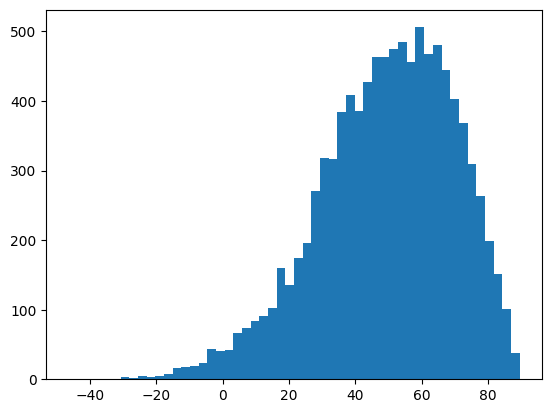

In [69]:
plt.figure()
plt.hist(b, bins="auto")
plt.show()

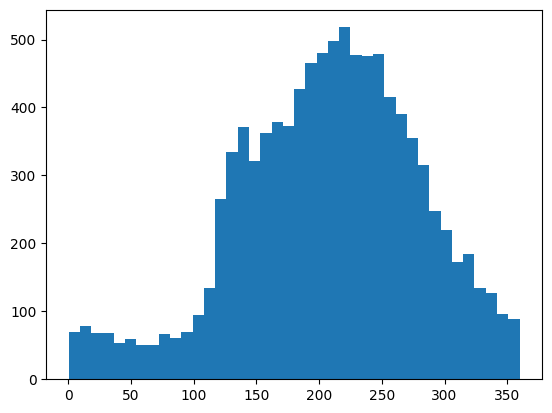

In [67]:
plt.figure()
plt.hist(ell, bins="auto")
plt.show()

### Figure: Evidence as a function of the sample size

In [20]:
mock_dir = "/Users/rstiskalek/Projects/CANDEL/results/mock_CF4_H0_anisotropy"

records = np.loadtxt("/Users/rstiskalek/Projects/CANDEL/data/CF4_mock/mock_index.txt", dtype=int, comments='#')
indices, nsamples = records[:, 0], records[:, 1]

fnames = [join(mock_dir, f"precomputed_los_Carrick2015_CF4_mock_{i}_noMNR_aTFRdipole.hdf5")
          for i in indices]


/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_74178/2261655444.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


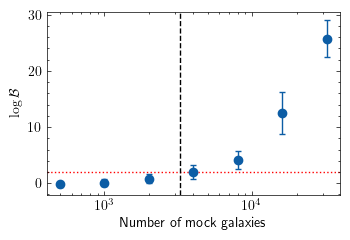

In [28]:
metric = "logZ_harmonic"
with plt.style.context("science"):
    fig, ax = plt.subplots(1, 1, figsize=(3.6, 2.5))
    lw = plt.rcParams["lines.linewidth"]
    unique_ns = np.unique(nsamples)

    means = []
    stds = []
    xticks = []

    gof = [
        compare_zeropoint_dipole_gof(fname, metric, verbose=False)
        for fname in fnames
    ]
    gof = np.asarray(gof)

    for num_samples in unique_ns:
        mask = nsamples == num_samples
        gof_vals = gof[mask]

        if np.sum(np.isfinite(gof_vals)) == 0:
            continue

        mean = np.nanmean(gof_vals)
        std = np.nanstd(gof_vals)
        means.append(mean)
        stds.append(std)
        xticks.append(num_samples)

    ax.errorbar(
        xticks, means, yerr=stds,
        fmt='o', capsize=2, elinewidth=lw, linewidth=lw
    )

    ax.set_xlabel("Number of mock galaxies")
    ax.set_ylabel(r"$\log \mathcal{B}$")
    ax.axhline(2, color="red", linestyle="dotted", lw=lw, zorder=0)

    ax.set_xscale("log")

    if 3250 > min(xticks) and 3250 < max(xticks):
        x_idx = np.interp(3250, xticks, np.arange(len(xticks)))
        ax.axvline(x=3250, c="k", linestyle="dashed", lw=lw, zorder=0)

    fig.tight_layout()
    fig.savefig("evidence_comparison.pdf", dpi=450)
    fig.show()

### Figure: Total Flow

In [61]:
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=100, Om0=0.3,)

f = np.load("/Users/rstiskalek/Projects/CANDEL/data/fields/enclosed_mass_Carrick2015.npz")  # noqa
r, B = f["distances"], f["cumulative_velocity"]
B = B[0]

In [62]:
with File('/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5', 'r') as f:
    print(f["samples"].keys())
    Vext = f["samples/Vext"][...]
    beta = f["samples/beta"][...]
    
    a_TFR_dipole_b = f["samples/a_TFR_dipole_b"][...]
    a_TFR_dipole_ell = f["samples/a_TFR_dipole_ell"][...]
    a_TFR_dipole_mag = f["samples/a_TFR_dipole_mag"][...]

<KeysViewHDF5 ['Vext', 'Vext_b', 'Vext_ell', 'Vext_mag', 'a_TFR', 'a_TFR_dipole_b', 'a_TFR_dipole_ell', 'a_TFR_dipole_mag', 'b1', 'b_TFR', 'beta', 'c_TFR', 'eta_latent', 'eta_prior_mean', 'eta_prior_std', 'mag_latent', 'sigma_mu', 'sigma_v']>


In [78]:
a_TFR_dip = a_TFR_dipole_mag[:, None] * candel.galactic_to_radec_cartesian(a_TFR_dipole_ell, a_TFR_dipole_b,)


z_grid = np.linspace(1e-6, 0.1, 10000)
cz_grid = z_grid * candel.SPEED_OF_LIGHT

mu_grid = cosmo.distmod(z_grid).value
r_grid = cosmo.comoving_distance(z_grid).value

dczdmu_grid = np.gradient(cz_grid, mu_grid)
dczdmu = np.interp(r, r_grid, dczdmu_grid)



In [120]:
y = dczdmu[None, :, None] * a_TFR_dip[:, None, :]


y -= V

ymag = np.sqrt(np.sum(y**2, axis=-1))

ylow, ymed, yhigh = np.percentile(ymag, [16, 50, 84], axis=0)


y *= -1 


f_mag, f_ell, f_b = candel.radec_cartesian_to_galactic(y[..., 0], y[..., 1], y[..., 2])


/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_87271/1313250484.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


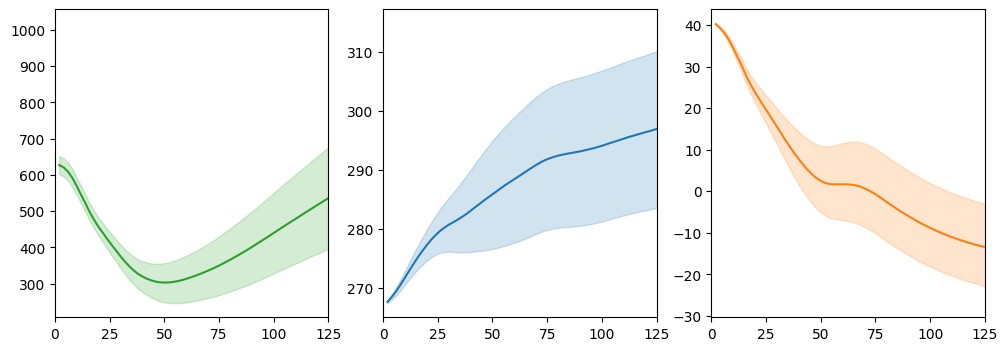

In [121]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

ylow, ymed, yhigh = np.percentile(f_mag, [16, 50, 84], axis=0)
axs[0].fill_between(r, ylow, yhigh, alpha=0.2, color="C2")
axs[0].plot(r, ymed, color="C2", )

ylow, ymed, yhigh = np.percentile(f_ell, [16, 50, 84], axis=0)
axs[1].fill_between(r, ylow, yhigh, alpha=0.2, color="C0")
axs[1].plot(r, ymed, color="C0", )

ylow, ymed, yhigh = np.percentile(f_b, [16, 50, 84], axis=0)
axs[2].fill_between(r, ylow, yhigh, alpha=0.2, color="C1")
axs[2].plot(r, ymed, color="C1", )


for ax in axs:
    ax.set_xlim(0, 125)


fig.show()









In [95]:
y.shape

(15000, 100, 3)

In [94]:
70 * 0.04 * 100

280.0

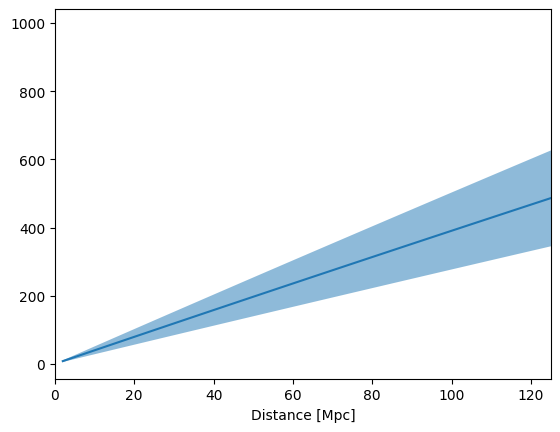

In [92]:
plt.figure()
plt.fill_between(r, ylow, yhigh, alpha=0.5)
plt.plot(r, ymed, label="Median")
plt.xlabel("Distance [Mpc]")


plt.xlim(0, 125)

plt.show()


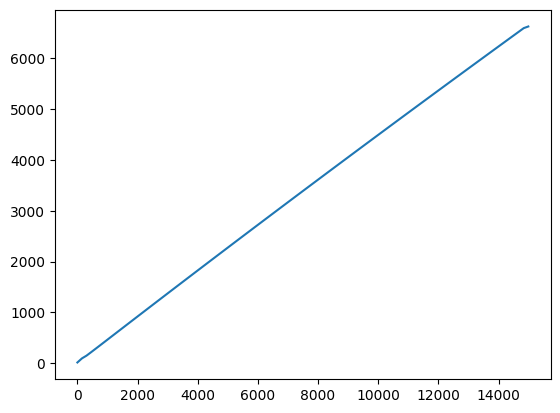

In [59]:
plt.figure()
plt.plot(cz, dczdmu)

plt.show()


In [ ]:
a_TFR_dip.shape





(15000, 3)

In [43]:
V = beta[:, None, None] * B[None, :, :] + 0 * Vext[:, None, :]

Vmag = np.sqrt(np.sum(V**2, axis=-1))

Vlow, Vmed, Vhigh = np.percentile(Vmag, [16, 50, 84], axis=0)

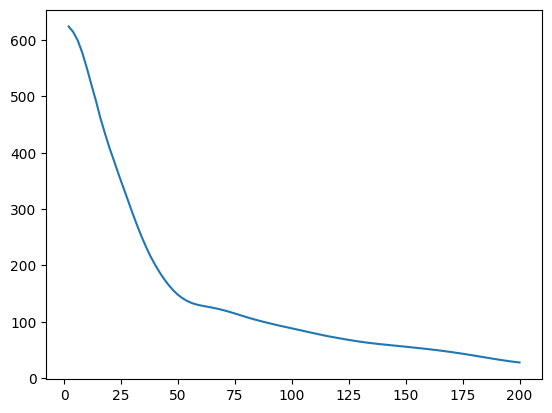

In [44]:
plt.figure()
plt.plot(r, Vmed, label="Median", color="C0")


plt.show()

### Playground

In [ ]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR.hdf5",
    ]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    keys=["Vext_mag", "Vext_ell", "Vext_b"],
    )